In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# Funciones utilizadas en Clase

def f0(S, I, beta, gamma):
    return -beta*S*I

def f1(S, I, beta, gamma):
    return beta*S*I - gamma*I

### Orden 1

In [3]:
def GetEulerSystem(f0,f1,r0,t): # dos funciones (eq diferenciales), vector con condiciones iniciales, tiempo
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # condicion inicial
    S[0] = r0[0]
    I[0] = r0[1]
    
    # vectorizacion de las pendientes
    K1 = np.zeros(2)
    
    for i in range(1,len(t)):
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        S[i] = S[i-1] + h*K1[0]
        I[i] = I[i-1] + h*K1[1]
        
    return S,I

### Orden 2

In [4]:
def GetEuler2System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        
        S[i] = S[i-1] + 0.5*h*(K1[0]+K2[0])
        I[i] = I[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return S,I

### Orden 3

In [5]:
def GetEuler3System(f0,f1,r0,t): # dos funciones (eq diferenciales), vector con condiciones iniciales, tiempo
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # condicion inicial
    S[0] = r0[0]
    I[0] = r0[1]
    
    # vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    
    for i in range(1,len(t)):
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+h*K1[0]/2, I[i-1]+h*K1[1]/2,beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0]/2, I[i-1]+h*K1[1]/2, beta,gamma)
        
        #revisar
        K3[0] = f0(S[i-1]+h*K1[0], I[i-1]-h*K1[1]+h*(K2[1]*2),beta,gamma)
        K3[1] = f1(S[i-1]+h*K1[0], I[i-1]-h*K1[1]+h*(K2[1]*2), beta,gamma)
        
        S[i] = S[i-1] + h*(K1[0] + 4*K2[0] + K3[0])/6
        I[i] = I[i-1] + h*(K1[1] + 4*K2[1] + K3[1])/6
    
    return S,I

### Orden 4

In [18]:
def GetEuler4System(f0,f1,r0,t): # dos funciones (eq diferenciales), vector con condiciones iniciales, tiempo
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # condicion inicial
    S[0] = r0[0]
    I[0] = r0[1]
    
    # vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+h*K1[0]/2, I[i-1]+h*K1[1]/2,beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0]/2, I[i-1]+h*K1[1]/2, beta,gamma)
        
        #revisar
        K3[0] = f0(S[i-1]+h*K2[0]/2, I[i-1]+h*K2[1]/2,beta,gamma)
        K3[1] = f1(S[i-1]+h*K2[0]/2, I[i-1]+h*K2[1]/2, beta,gamma)
        
        K4[0] = f0(S[i-1]+h*K3[0], I[i-1]+h*K3[0],beta,gamma)
        K4[1] = f1(S[i-1]+h*K3[0], I[i-1]+h*K3[0],beta,gamma)
        
        S[i] = S[i-1] + h*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0])/6
        I[i] = I[i-1] + h*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1])/6
    
    return S,I

### Usando python scipy

In [19]:
def System(r,t,beta,gamma): # 
    
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

t = np.linspace(0,30,100)
r0 = [1000,1]
r = integrate.odeint( System, r0, t, args=(0.002,0.5) ) # Ruge-kutta 45 adaptativo

### Prueba

In [20]:
r0 = [1000,1]
beta = 0.002
gamma = 0.5

S1, I1 = GetEulerSystem(f0,f1,r0,t)
S2, I2 = GetEuler2System(f0,f1,r0,t)
S3, I3 = GetEuler3System(f0,f1,r0,t)
S4, I4 = GetEuler4System(f0,f1,r0,t)

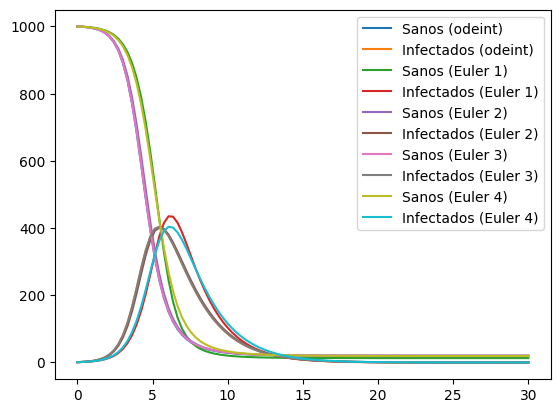

In [21]:
plt.plot(t,r[:,0], label = 'Sanos (odeint)')
plt.plot(t,r[:,1], label = 'Infectados (odeint)')

plt.plot(t,S1,label='Sanos (Euler 1)')
plt.plot(t,I1,label='Infectados (Euler 1)')

plt.plot(t,S2,label='Sanos (Euler 2)')
plt.plot(t,I2,label='Infectados (Euler 2)')

plt.plot(t,S3,label='Sanos (Euler 3)')
plt.plot(t,I3,label='Infectados (Euler 3)')

plt.plot(t,S4,label='Sanos (Euler 4)')
plt.plot(t,I4,label='Infectados (Euler 4)')
plt.legend()

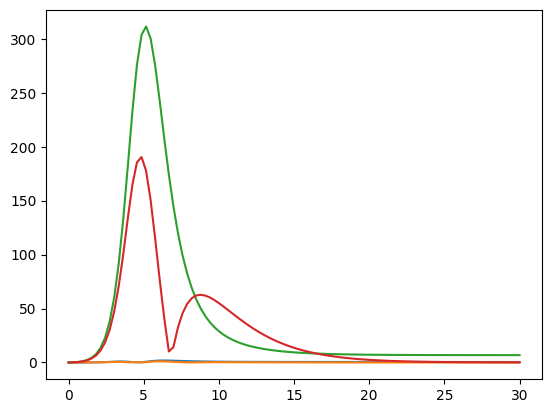

In [17]:
#plt.plot(t,np.abs(r[:,0]-S1))
#plt.plot(t,np.abs(r[:,1]-I1))
#plt.plot(t,np.abs(r[:,0]-S2))
#plt.plot(t,np.abs(r[:,1]-I2))
plt.plot(t,np.abs(r[:,0]-S3))
plt.plot(t,np.abs(r[:,1]-I3))
plt.plot(t,np.abs(r[:,0]-S4))
plt.plot(t,np.abs(r[:,1]-I4))